# Fit Dataset Made by Myself

<br />

I will do classification and object detection for a dataset made by myself.

## [Task 1] Fit Dataset Made by Myself for Classification

In [1]:
import glob
import numpy as np
from PIL import Image
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
import urllib3.request
import cv2
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [3]:
folder = ["rabbit", "duck"]
image_size = 512
 
X = []
Y = []
for index, name in enumerate(folder):
    dir = "./" + name
    files = glob.glob(dir + "/*.jpeg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

In [4]:
# Test data

test = []
test_image = Image.open("rabbit-3.jpeg")
test_image = image.convert("RGB")
test_image = test_image.resize((image_size, image_size))
test_data = np.asarray(test_image)
test.append(test_data)
test = np.array(test)

In [5]:
# Transform the images to a range between 0 and 1

X = X.astype("float32")
test = test.astype("float32")

X = X / 255.0
test = test / 255.0

In [6]:
# Transform the form of the correct labels

Y = np_utils.to_categorical(Y, 2)

In [7]:
# CNN

model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
 
# Compile
model.compile(loss='binary_crossentropy', optimizer='SGD',metrics=['accuracy'])

In [8]:
# Fit

history = model.fit(X, Y, epochs=10)

Epoch 1/10
5/5 [==============================] - 116s 23s/step - loss: 0.6688 - acc: 0.6000
Epoch 2/10
5/5 [==============================] - 132s 26s/step - loss: 2.2051 - acc: 0.8000
Epoch 3/10
5/5 [==============================] - 109s 22s/step - loss: 3.6972 - acc: 0.4000
Epoch 4/10
5/5 [==============================] - 93s 19s/step - loss: 0.7011 - acc: 0.2000
Epoch 5/10
5/5 [==============================] - 121s 24s/step - loss: 0.6919 - acc: 0.6000
Epoch 6/10
5/5 [==============================] - 101s 20s/step - loss: 0.6868 - acc: 0.6000
Epoch 7/10
5/5 [==============================] - 112s 22s/step - loss: 0.6842 - acc: 0.6000
Epoch 8/10
5/5 [==============================] - 101s 20s/step - loss: 0.6620 - acc: 0.6000
Epoch 9/10
5/5 [==============================] - 89s 18s/step - loss: 0.6782 - acc: 0.6000
Epoch 10/10
5/5 [==============================] - 83s 17s/step - loss: 0.6753 - acc: 0.6000


In [9]:
# Predict

pred_proba = model.predict(test)

# Change probabilities to 0/1
pred = np.where(pred_proba>0.5, 1, 0)

print("pred_proba", pred_proba)
print("pred", pred)

('pred_proba', array([[ 0.42559025,  0.57440972]], dtype=float32))
('pred', array([[0, 1]]))


    - This model predicted the test image as duck, but it is actually an image of a rabbit.

## [Task 2] Data Augmentation for Classification Dataset

<br />

There are libraries for data augmentation like albumentations.


https://github.com/albu/albumentations

In [10]:
folder = ["rabbit", "duck"]
image_size = 512
 
X = []
Y = []
for index, name in enumerate(folder):
    dir = "./" + name
    files = glob.glob(dir + "/*.jpeg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)

X = np.array(X)
Y = np.array(Y)

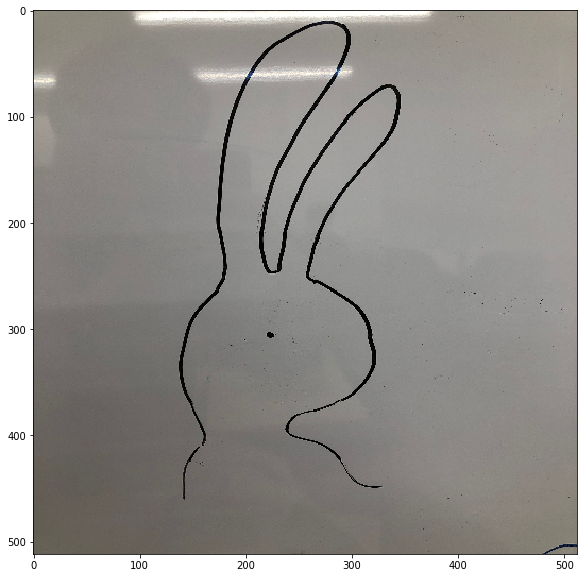

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(X[0])
plt.show()

In [12]:
# Transform the images to a range between 0 and 1

X = X.astype("float32")
X = X / 255.0

In [13]:
# Transform the form of the correct labels

Y = np_utils.to_categorical(Y, 2)

In [14]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

None
None
None
None
None
None


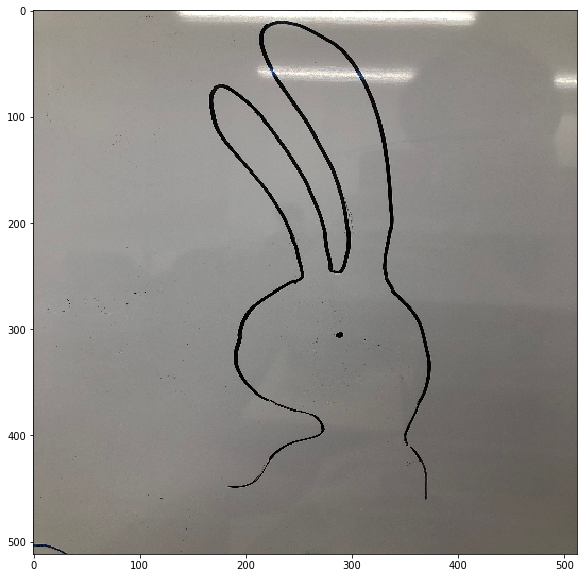

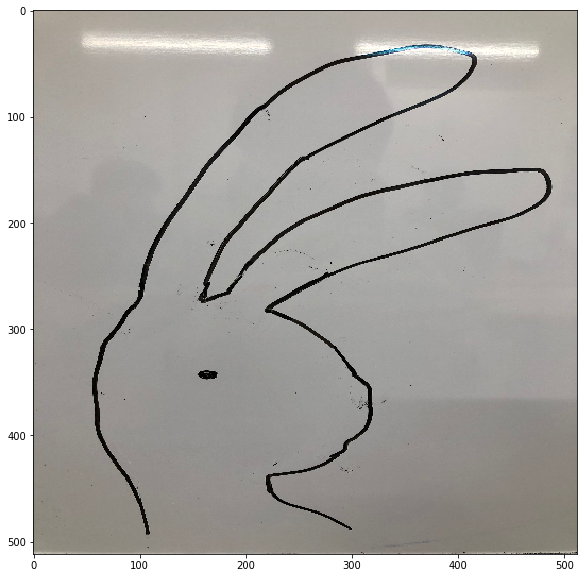

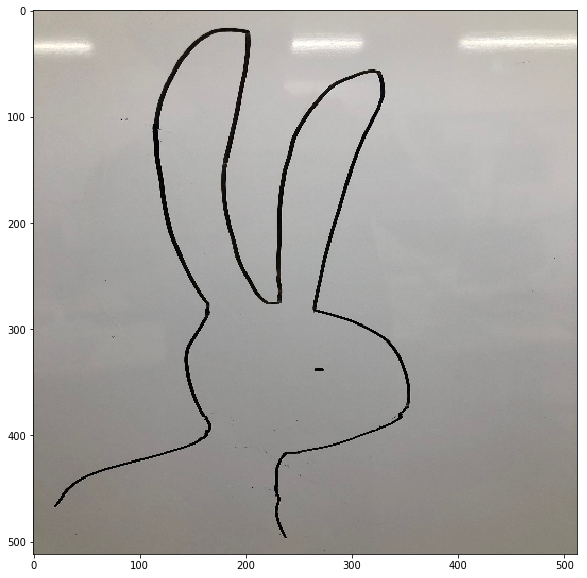

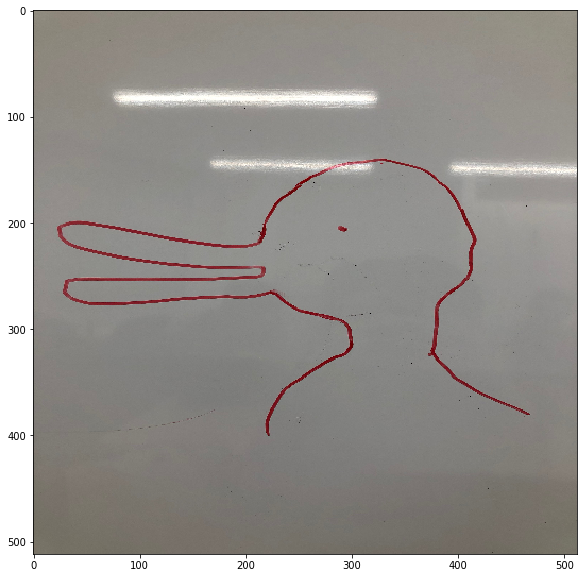

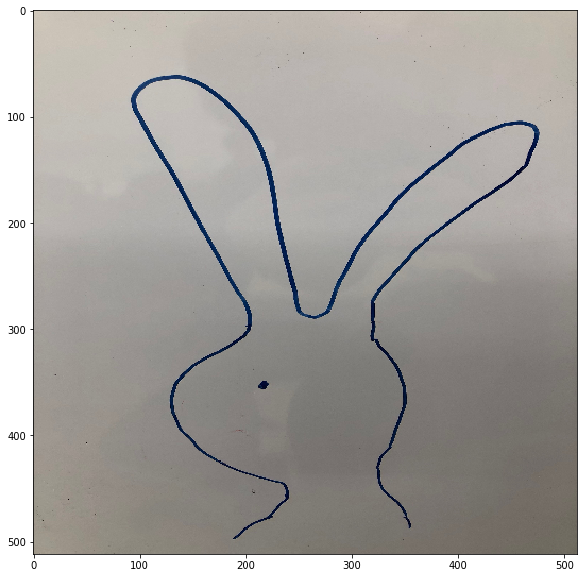

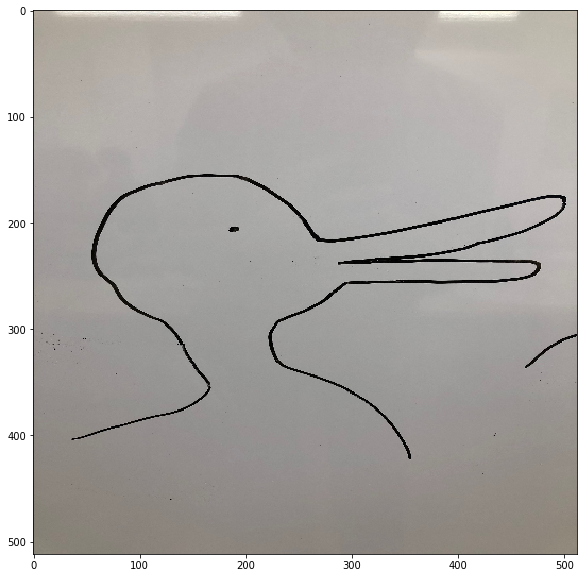

In [16]:
aug = HorizontalFlip(p=1)
for image in X:
    print(augment_and_show(aug, image))